In [2]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # plot style

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import *
import xgboost as xg

In [3]:
# load data
train_data = pd.read_csv("../datasets/train.csv", sep=None, engine='python')
test_data = pd.read_csv("../datasets/test.csv", sep=None, engine='python')

In [4]:
train_data.tail(5)

,癤퓁d,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi 채r b채st!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590
2997,2998,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761
2998,2999,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.alongcamepolly.com/,tt0343135,en,Along Came Polly,Reuben Feffer is a guy who's spent his entire ...,15.725542,...,1/16/04,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For the most cautious man on Earth, life is ab...",Along Came Polly,"[{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...","[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386
2999,3000,NaN,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.abductionthefilm.com/,tt1600195,en,Abduction,A young man sets out to uncover the truth abou...,10.512109,...,9/22/11,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They stole his life. He's taking it back.,Abduction,"[{'id': 591, 'name': 'cia'}, {'id': 822, 'name...","[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155


### Data Statistic Analysis

In [5]:
m_train, n1 = train_data.shape
m_test, n2 = test_data.shape
print("{} training samples".format(m_train))
print("{} test samples".format(m_test))
print("{} features to data".format(n1))

3000 training samples
4398 test samples
23 features to data


Text(0.5,1,'Count Columns By Datatypes')

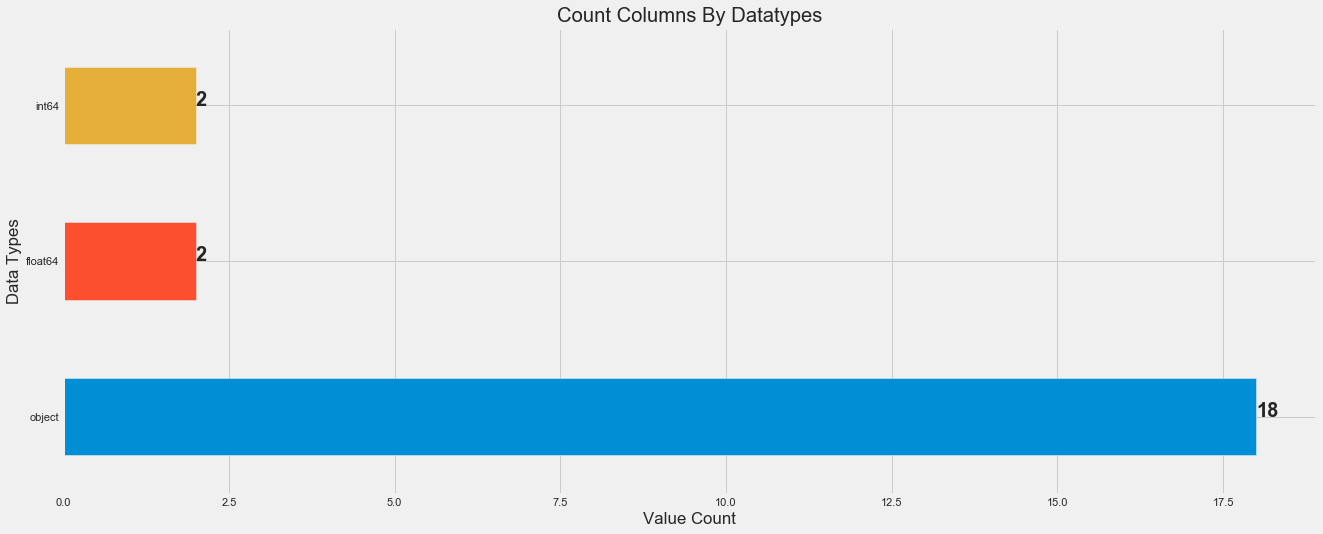

In [8]:
test_data.dtypes.value_counts().plot(kind='barh', figsize=(20,8))

for i,v in enumerate(test_data.dtypes.value_counts()):
    # add text
    plt.text(v, i, str(v), fontweight='bold', fontsize=20)
plt.xlabel("Value Count")
plt.ylabel("Data Types")
plt.title("Count Columns By Datatypes")

In [11]:
print("- The target is: \n{}".format([item for item in train_data.columns.tolist() if item not in test_data.columns.tolist()]))
print(train_data["".join(item for item in train_data.columns.tolist() if item not in test_data.columns.tolist())].dtypes)

- The target is: 
['revenue']
int64


In [12]:
train_data.describe()

,癤퓁d,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


##### Some Insight from Statistics
- revenue==1, runtime==0인 부분들
- 왜 budget의 일부가 다 0인가? 확인해봐야함
- popularity의 의미는 무엇인가?

In [14]:
# revenue = 1 ?
# 4개
train_data[train_data['revenue'] == 1]

,癤퓁d,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
347,348,NaN,12,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,tt0118172,en,The Wind in the Willows,"Jailed for his reckless driving, rambunctious ...",1.410322,...,10/16/96,84.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Go wild in the country!,The Wind in the Willows,NaN,"[{'cast_id': 2, 'character': 'Toad', 'credit_i...","[{'credit_id': '59ce7655c3a3686aca01a522', 'de...",1
1754,1755,NaN,2,"[{'id': 53, 'name': 'Thriller'}, {'id': 10769,...",NaN,tt0110604,en,Mute Witness,"Billy is mute, but it hasn't kept her from bec...",2.466066,...,9/28/95,95.0,"[{'iso_639_1': 'ru', 'name': 'P�꺫곎곍분먁�'}, {'is...",Released,She Can't Speak. She Can't Scream. She Can't B...,Mute Witness,"[{'id': 3713, 'name': 'chase'}, {'id': 6149, '...","[{'cast_id': 22, 'character': 'Billy Hughes', ...","[{'credit_id': '52fe4775c3a36847f8136af1', 'de...",1
1874,1875,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.vt4.be/vermist,tt1133617,en,Vermist,Five members of the Missing Persons Task Force...,0.229233,...,1/1/07,0.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}]",Released,NaN,Missing,NaN,"[{'cast_id': 2, 'character': 'Murat Hoxha', 'c...","[{'credit_id': '52fe4838c3a36847f815cef1', 'de...",1
1917,1918,NaN,592,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",NaN,tt0016104,en,The Merry Widow,Prince Danilo falls in love with dancer Sally ...,0.286719,...,8/26/25,137.0,NaN,Released,NaN,The Merry Widow,"[{'id': 1691, 'name': 'dance'}, {'id': 10181, ...","[{'cast_id': 2, 'character': ""Sally O'Hara"", '...","[{'credit_id': '57351170c3a36802410000d5', 'de...",1


In [16]:
# runtime = 0 ?
# 12개
train_data[train_data.runtime == 0]

,癤퓁d,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
390,391,NaN,6843500,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2550838,it,Il peggior Natale della mia vita,NaN,3.800073,...,12/22/12,0.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,The Worst Christmas of My Life,NaN,"[{'cast_id': 2, 'character': 'Alberto', 'credi...","[{'credit_id': '52fe4bb79251416c7510bc79', 'de...",10703234
591,592,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,tt0768690,ru,�� 極棘�꺫귂��� 棘戟龜 極��棘�곍싼꺪뿅먈곎�,NaN,0.402368,...,12/4/03,0.0,"[{'iso_639_1': 'ru', 'name': 'P�꺫곎곍분먁�'}]",Released,NaN,�� 極棘�꺫귂��� 棘戟龜 極��棘�곍싼꺪뿅먈곎�,"[{'id': 4897, 'name': 'multiple character'}, {...","[{'cast_id': 8, 'character': '', 'credit_id': ...","[{'credit_id': '52fe4d449251416c911103f5', 'de...",234748
924,925,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2604346,es,쩔Qui챕n mat처 a Bambi?,It tells the story of two young friends who mu...,1.926826,...,11/15/13,0.0,"[{'iso_639_1': 'es', 'name': 'Espa챰ol'}]",Released,NaN,쩔Qui챕n mat처 a Bambi?,"[{'id': 1930, 'name': 'kidnapping'}, {'id': 97...","[{'cast_id': 3, 'character': 'David', 'credit_...","[{'credit_id': '52fe4e31c3a368484e21370b', 'de...",850259
977,978,NaN,11000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2076251,it,La peggior settimana della mia vita,NaN,5.010563,...,10/27/11,0.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,La peggior settimana della mia vita,NaN,"[{'cast_id': 4, 'character': 'Paolo', 'credit_...","[{'credit_id': '52fe4984c3a368484e12f923', 'de...",12935800
1255,1256,NaN,0,"[{'id': 37, 'name': 'Western'}]",NaN,tt0072785,it,Cipolla Colt,Onion Jack (Franco Nero) has bought a piece of...,1.623440,...,8/25/75,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,"Cry, Onion!","[{'id': 156212, 'name': 'spaghetti western'}]","[{'cast_id': 14, 'character': 'Onion Stark', '...","[{'credit_id': '52fe493a9251416c750c169b', 'de...",39598448
1541,1542,NaN,750000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",NaN,tt3805180,ru,�믍곍� 龜 �곎�逵鈞��,NaN,0.201582,...,6/5/14,0.0,"[{'iso_639_1': 'ru', 'name': 'P�꺫곎곍분먁�'}]",Released,NaN,All at Once,"[{'id': 642, 'name': 'robbery'}, {'id': 231149...","[{'cast_id': 3, 'character': 'Viktor', 'credit...","[{'credit_id': '53b7a7b90e0a2676b8006ab6', 'de...",3
1874,1875,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.vt4.be/vermist,tt1133617,en,Vermist,Five members of the Missing Persons Task Force...,0.229233,...,1/1/07,0.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}]",Released,NaN,Missing,NaN,"[{'cast_id': 2, 'character': 'Murat Hoxha', 'c...","[{'credit_id': '52fe4838c3a36847f815cef1', 'de...",1
2150,2151,NaN,5000000,"[{'id': 28, 'name': 'Action'}, {'id': 10749, '...",NaN,tt0477337,ru,Mechenosets,NaN,0.414793,...,10/12/06,0.0,"[{'iso_639_1': 'ru', 'name': 'P�꺫곎곍분먁�'}]",Released,NaN,Mechenosets,NaN,"[{'cast_id': 2, 'character': 'Sasha', 'credit_...","[{'credit_id': '52fe46bec3a368484e0a14f7', 'de...",3919731
2498,2499,"[{'id': 106790, 'name': 'Hooked Collection', '...",3500000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",NaN,tt1620549,ru,Na Igre 2. Novyy Uroven,The continuation of the adventures of the hero...,0.884241,...,4/15/10,0.0,"[{'iso_639_1': 'ru', 'name': 'P�꺫곎곍분먁�'}]",Released,NaN,Hooked on the Game 2. The Next Level,NaN,"[{'cast_id': 10, 'character': 'Vampire', 'cred...","[{'credit_id': '52fe46759251416c91055281', 'de...",2294357
2645,2646,NaN,0,"[{'id': 10749, 'name': 'Romance'}]",NaN,tt3956312,en,�릪旅뚨쉪倻�,"In the summer of 1993, timid and shy Zhou Xiao...",0.504000,...,4/25/14,0.0,"[{'iso_639_1': 'zh', 'name': '�솹��싪캕'}]",Released,NaN,My Old Classmate,NaN,"[{'cast_id': 0, 'character': 'Zhou Xiao Zhi', ...","[{'credit_id': '54064dd90e0a2658d800d8d9', 'de...",76000000


##### 필요없는 columns 버리기

In [17]:
train_data.drop(columns=['homepage','imdb_id', 'original_title', 'poster_path'], inplace=True)
test_data.drop(columns=['homepage','imdb_id', 'original_title', 'poster_path'], inplace=True)

# 형변환 (type change)
train_data.budget = train_data.budget.astype(float)
test_data.budget = test_data.budget.astype(float)

train_data.revenue = train_data.revenue.astype(float)

Text(0.5,1,'MIssing Value count by features')

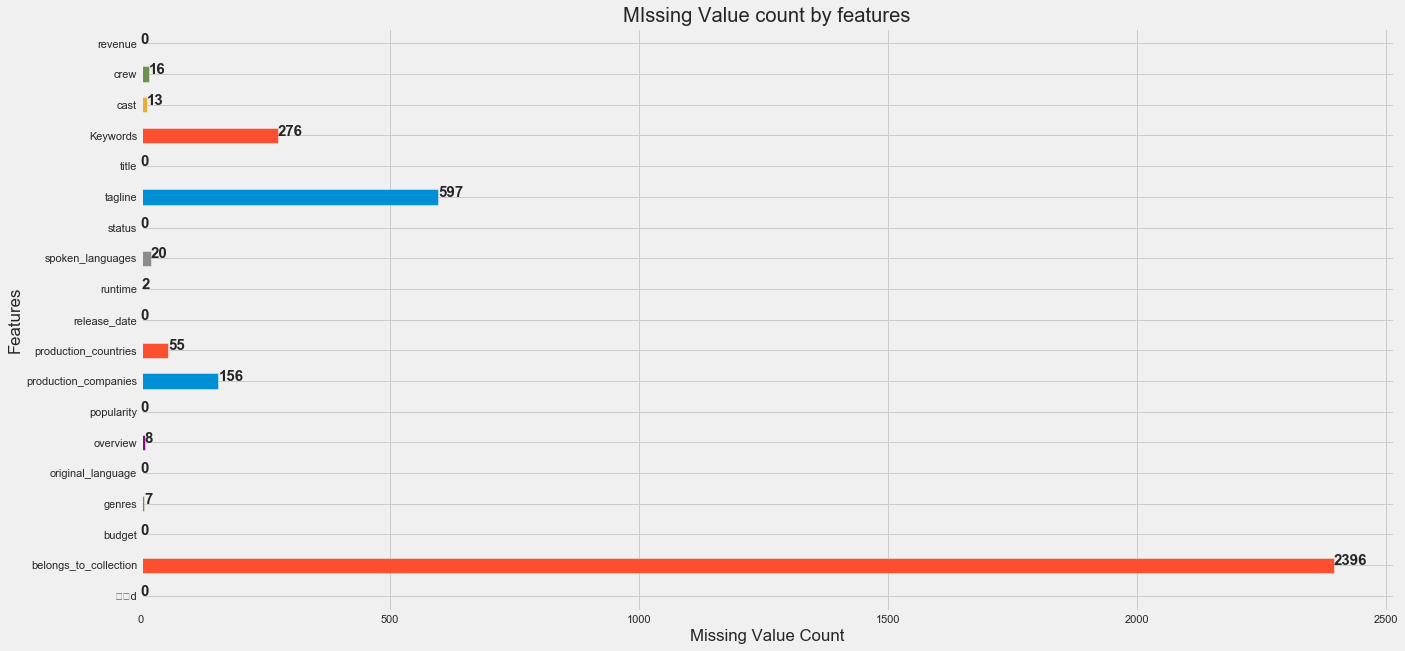

In [27]:
train_data.isna().sum().plot(kind='barh', figsize=(20,10))

for i, v in enumerate(train_data.isna().sum()):
    plt.text(v,i, str(v), fontweight='bold', fontsize=15)

plt.xlabel("Missing Value Count")
plt.ylabel("Features")
plt.title("MIssing Value count by features")

#### Importance Feature Analysis
- budget
- popularity
- runtime

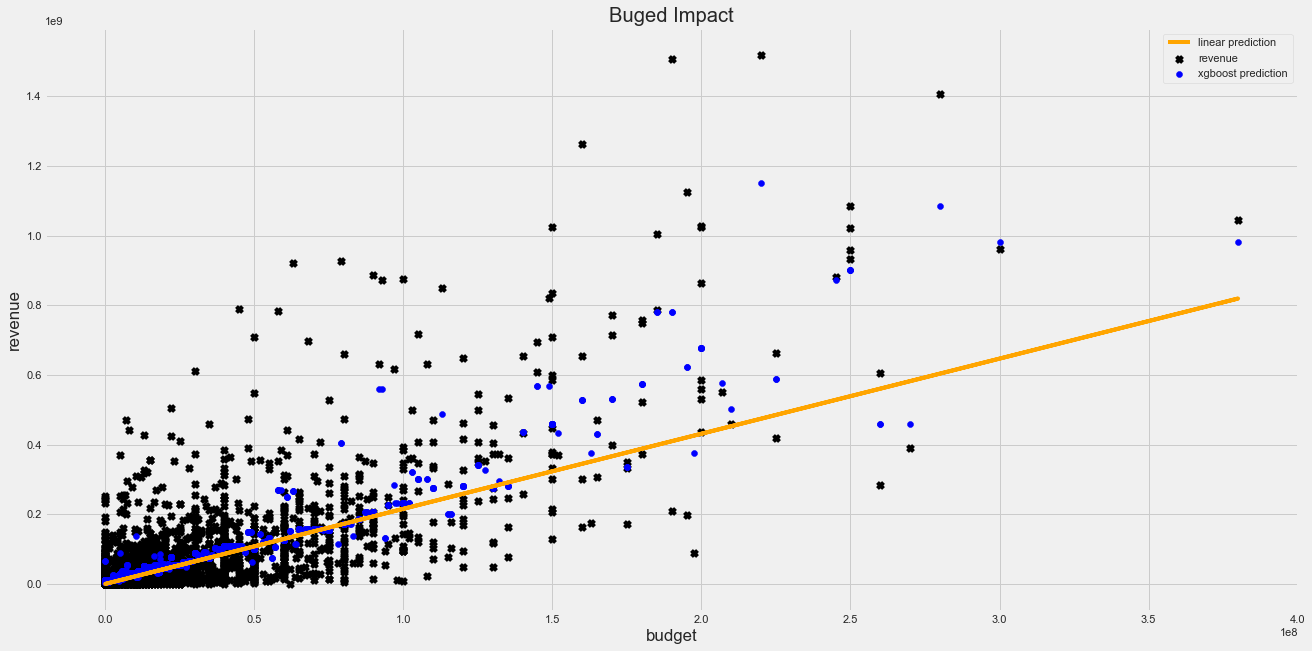

In [30]:
# budget

# (budget, ratio) : scatter
plt.figure(figsize=(20,10))
plt.scatter(x=train_data['budget'], y=train_data['revenue'], marker='x', color='black')

#---------------------------------------------
# fit linear model
model = linear_model.HuberRegressor()
model.fit(X=np.array(train_data['budget']).reshape(-1,1), y=train_data['revenue'])
rev_pred = model.predict(np.array(train_data['budget']).reshape(-1,1))

# plot the fitted
plt.plot(train_data['budget'], rev_pred, color='orange', label='linear prediction')
#---------------------------------------------
# fit xgboost model
# silent ?  Whether print messages during construction
params = {'eval_metric':'rmse', 'silent' : 1}
dtrain = xg.DMatrix(np.array(train_data['budget']).reshape(-1,1), label=np.array(train_data['revenue']))
xg_model = xg.train(params=params, dtrain=dtrain)
dtest = xg.DMatrix(np.array(train_data['budget']).reshape(-1,1))
rev_pred = xg_model.predict(dtest)

# plot the xg_fitted
plt.scatter(train_data['budget'], rev_pred, color='blue', label='xgboost prediction')
#---------------------------------------------
plt.xlabel("budget")
plt.ylabel("revenue")
plt.title("Buged Impact")
plt.legend()
plt.show()
